In this notebook, softmax classification is done on Spirals dataset using feedforward deep neural network implemented from scratch


In [1]:
#import libraries
import os
import numpy as np
import matplotlib.pyplot as plt
from softmax_classification import DeepNN
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

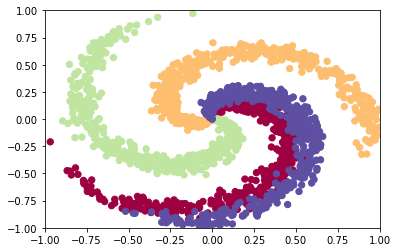

In [2]:
#Generate spirals dataset and visualise 
np.random.seed(0)
N = 500 # number of points per class
D = 2 # dimensionality
K = 4 # number of classes
X = np.zeros((N*K,D))
y = np.zeros(N*K, dtype='uint8')
for j in range(K):
  ix = range(N*j,N*(j+1))
  r = np.linspace(0.0,1,N) # radius
  t = np.linspace(j*4,(j+1)*4,N) + np.random.randn(N)*0.2 # theta
  X[ix] = np.c_[r*np.sin(t), r*np.cos(t)]
  y[ix] = j
fig = plt.figure()
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)
plt.xlim([-1,1])
plt.ylim([-1,1])
x_train = X
y_train = y_train = np.eye(4)[y]

In [3]:
#Dataset desciptrion
print('Training set shape:' + str(x_train.shape))
print('Validation set shape:' + str(y_train.shape))

Training set shape:(2000, 2)
Validation set shape:(2000, 4)


In [4]:
#Initialising the Neural network
deepnn = DeepNN(num_layers=3,activation_fns=['relu','relu','softmax'],initialisation='He',units=[2,40,30,4])
training_costs = deepnn.train_NN(x_train,y_train,epochs=500,learning_rate=0.03,algo_dict={'None'})

Epoch 100
Training Cost: 1.1192110202074705
---------------------
Epoch 200
Training Cost: 1.0207710435879531
---------------------
Epoch 300
Training Cost: 0.9558775009818531
---------------------
Epoch 400
Training Cost: 0.9006597248333746
---------------------
Epoch 500
Training Cost: 0.8508612899011155
---------------------


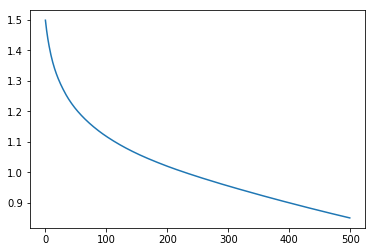

In [6]:
#plot the training costs vs iterations
plt.plot(range(500),training_costs)
plt.show()

In [14]:
#Training accuracy
print("Training set accuracy:" + str(np.sum(y_pred==np.argmax(y_train,axis=1))/y_train.shape[0]))

Training set accuracy:0.686


With appropriate selection of hyperparameter, we can increase this accuracy